In [28]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 5]

# Load and browse data

In [2]:
training = pd.read_csv("../input_data/train.csv")

In [3]:
training.head()

,row ID,time,EM_PIntkMnfld,EM_PExhMnfld,EM_TIntkMnfld,EM_TExhTrbDs,EM_NEng,EM_MFuInj,EM_PosnThrVlvDmd,EM_PosnWgDmd,EM_PosnEgrVlvDmd,EM_MfAir
0,Row0,0.00,0.0000,0.0000,-1.09260,-1.0926,1200,0,99.93,0.000,0.000,0.0
1,Row1,0.01,2.2711,2.3745,-0.60655,7.8706,1000,245,75.00,31.175,13.979,1325.0
2,Row2,0.02,4.4224,4.4923,-0.20468,17.1140,650,245,75.00,31.175,13.979,1325.0
3,Row3,0.03,6.4791,6.1576,0.13015,25.3010,650,245,75.00,31.175,13.979,1325.0
4,Row4,0.04,8.5146,7.9359,0.45593,34.5510,650,245,75.00,31.175,13.979,1325.0


In [4]:
training.describe()

,time,EM_PIntkMnfld,EM_PExhMnfld,EM_TIntkMnfld,EM_TExhTrbDs,EM_NEng,EM_MFuInj,EM_PosnThrVlvDmd,EM_PosnWgDmd,EM_PosnEgrVlvDmd,EM_MfAir
count,497225.000000,497225.000000,497225.000000,497225.000000,497225.000000,497225.000000,497225.000000,497225.000000,497225.000000,497225.000000,497225.000000
mean,342.983234,122.295428,128.027299,51.913970,343.738094,950.784353,88.515666,92.137341,31.129079,14.770116,414.976134
std,222.876725,35.233911,27.618141,25.353997,125.736497,283.596950,66.559831,9.137575,8.425752,6.657829,245.724226
min,0.000000,0.000000,0.000000,-1.092600,-1.092600,650.000000,0.000000,75.000000,0.000000,0.000000,0.000000
25%,155.380000,97.300000,110.890000,27.911000,248.640000,650.000000,36.000000,87.868000,28.044000,12.713000,264.520000
50%,320.840000,104.740000,118.660000,44.375000,355.540000,1000.000000,38.000000,91.030000,31.175000,13.979000,336.940000
75%,498.420000,135.230000,135.200000,69.527000,454.710000,1000.000000,129.000000,99.990000,34.391000,16.928000,516.600000
max,847.420000,232.180000,224.970000,138.680000,601.200000,1400.000000,245.000000,100.000000,50.000000,29.999000,1497.500000


In [9]:
training.isna().sum()

row ID              0
time                0
EM_PIntkMnfld       0
EM_PExhMnfld        0
EM_TIntkMnfld       0
EM_TExhTrbDs        0
EM_NEng             0
EM_MFuInj           0
EM_PosnThrVlvDmd    0
EM_PosnWgDmd        0
EM_PosnEgrVlvDmd    0
EM_MfAir            0
dtype: int64

In [10]:
training.columns

Index(['row ID', 'time', 'EM_PIntkMnfld', 'EM_PExhMnfld', 'EM_TIntkMnfld',
       'EM_TExhTrbDs', 'EM_NEng', 'EM_MFuInj', 'EM_PosnThrVlvDmd',
       'EM_PosnWgDmd', 'EM_PosnEgrVlvDmd', 'EM_MfAir'],
      dtype='object')

In [13]:
training.time[0:110].values

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09])

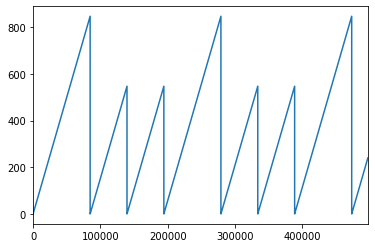

In [15]:
training.time.plot()

In [16]:
(training.time == 0.0).sum()

8

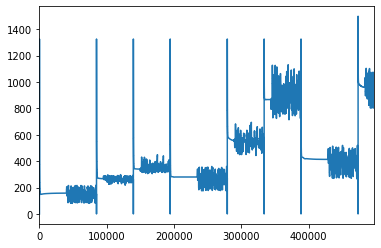

In [18]:
training.EM_MfAir.plot()

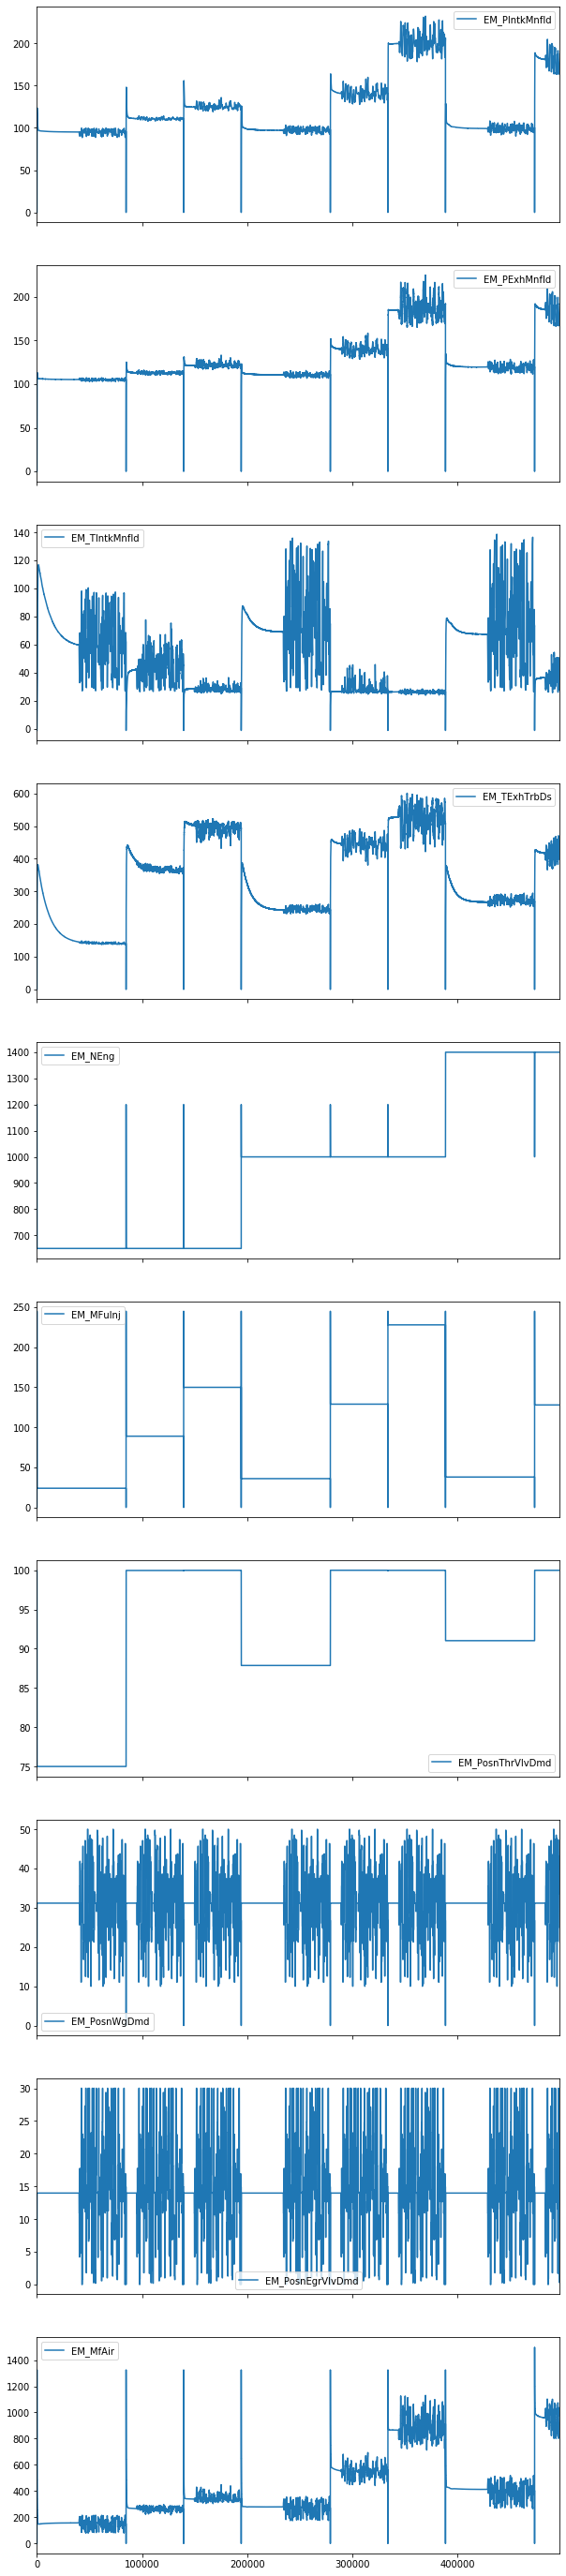

In [34]:
features = training.columns.tolist()[1:]

fig, axs = plt.subplots(len(features), 1, sharex=True, figsize=(10, 5*len(features)))

for ax, col in zip(axs, features):
    training[col].plot(legend=True, ax=ax)

In [68]:
reset_points = training[training['time'] == 0].index.tolist()
reset_points.append(training.index[-1])
reset_points = np.array(reset_points)
onset = reset_points[0:-1]
offset = reset_points[1:]-1

In [73]:
segments=[]
training['segment'] = -1
for i, on, off in zip(range(len(onset)), onset, offset):
    training.loc[on:off, 'segment']=i

In [77]:
segment_means = training.groupby('segment').mean()
segment_means

,time,EM_PIntkMnfld,EM_PExhMnfld,EM_TIntkMnfld,EM_TExhTrbDs,EM_NEng,EM_MFuInj,EM_PosnThrVlvDmd,EM_PosnWgDmd,EM_PosnEgrVlvDmd,EM_MfAir
segment,,,,,,,,,,,
-1,240.23,187.610000,192.360000,39.298000,401.890000,1400.000000,128.000000,99.991000,21.262000,29.999000,975.920000
0,423.71,95.403769,105.336592,67.761098,171.706690,650.010620,24.017972,75.000294,31.128666,14.614931,154.706107
1,273.71,111.128409,113.032551,42.644208,376.939532,650.016440,89.018322,99.973999,31.103275,14.963431,268.891188
2,273.71,125.317147,121.991601,28.226728,494.712797,650.016440,150.009408,99.989999,31.103275,14.963431,347.119211
3,423.71,97.700248,110.911935,73.860998,257.844664,1000.002360,36.011907,87.868142,31.128666,14.614931,276.357633
4,273.71,140.818473,140.136160,28.081664,445.914922,1000.003653,129.008238,99.999999,31.103275,14.963431,554.219019
5,273.71,200.605286,186.292742,26.272033,525.263004,1000.003653,227.997388,99.989999,31.103275,14.963431,876.760251
6,423.71,99.819207,119.589024,71.900339,278.740587,1399.992920,38.009322,91.030105,31.128666,14.614931,407.766647
7,120.11,181.104110,185.766774,35.931426,416.681144,1399.975024,128.014153,99.990997,31.369069,14.649677,965.415362


In [81]:
key_features = ['EM_MFuInj', 'EM_NEng', 'EM_PExhMnfld']
segment_means[key_features + ['EM_MfAir']]

,EM_MFuInj,EM_NEng,EM_PExhMnfld,EM_MfAir
segment,,,,
-1,128.000000,1400.000000,192.360000,975.920000
0,24.017972,650.010620,105.336592,154.706107
1,89.018322,650.016440,113.032551,268.891188
2,150.009408,650.016440,121.991601,347.119211
3,36.011907,1000.002360,110.911935,276.357633
4,129.008238,1000.003653,140.136160,554.219019
5,227.997388,1000.003653,186.292742,876.760251
6,38.009322,1399.992920,119.589024,407.766647
7,128.014153,1399.975024,185.766774,965.415362


In [82]:
segment_means[key_features + ['EM_MfAir']].corr()

,EM_MFuInj,EM_NEng,EM_PExhMnfld,EM_MfAir
EM_MFuInj,1.000000,0.056579,0.719781,0.678862
EM_NEng,0.056579,1.000000,0.624148,0.703561
EM_PExhMnfld,0.719781,0.624148,1.000000,0.991420
EM_MfAir,0.678862,0.703561,0.991420,1.000000


# Analysis
It seems one needs nothing more than the Feature **EM_PExhMnfld**
so a simple model would be to standardize **EM_PExhMnfld** and **EM_MfAir**, take the eval data, repeat the standardization for it, and apply the inverse standardization using the EM_MfAir standardizer to have a prediction ...

In [155]:
training[['EM_PExhMnfld', 'EM_MfAir']].agg(['mean', 'std'])

,EM_PExhMnfld,EM_MfAir
mean,128.027299,414.976134
std,27.618141,245.724226


In [174]:
training[['segment', 'EM_PExhMnfld', 'EM_MfAir']].groupby('segment').agg(['mean', 'std'])

EM_PExhMnfld               EM_MfAir           
                mean        std        mean        std
segment                                               
-1        192.360000        NaN  975.920000        NaN
 0        105.336592   2.158712  154.706107  37.284051
 1        113.032551   3.020896  268.891188  33.822157
 2        121.991601   3.906733  347.119211  35.576124
 3        110.911935   2.528692  276.357633  43.296947
 4        140.136160   6.139034  554.219019  47.452247
 5        186.292742  12.077447  876.760251  81.782276
 6        119.589024   3.620593  407.766647  51.942920
 7        185.766774  11.314678  965.415362  60.680205

In [156]:
def standardize(values, mean, std):
    return (values-mean)/std

def revStandardize(values, mean, std):
    return (values*std)+mean

In [162]:
pred = revStandardize(standardize(training['EM_PExhMnfld'], 128.027299, 27.618141), 414.976134, 245.724226)
pred.name='Prediction'

In [172]:
pred_error = pred - training['EM_MfAir']
pred_error.abs().sum()

21769530.987733677

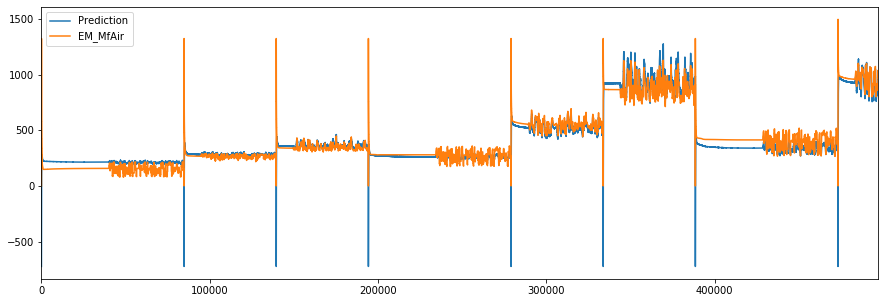

In [166]:
pred.plot(legend=True)
training['EM_MfAir'].plot(legend=True)

In [167]:
import math
def fit_percent(y_true: np.ndarray, y_pred: np.ndarray):
    """
    Should be smaller than 0.15%
    """
    rmse= math.sqrt(np.mean((y_true-y_pred)**2))
    std = np.std(y_true)
    return rmse/std

In [168]:
fit_percent(training['EM_MfAir'], pred)

0.289530701202921

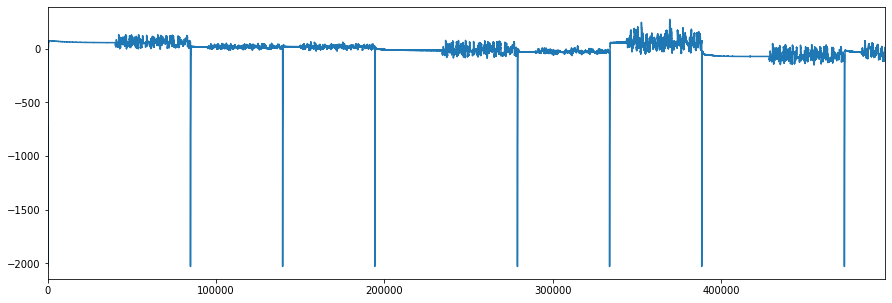

In [173]:
pred_error.plot()

In [108]:
actual.head()

0       0.0
1    1325.0
2    1325.0
3    1325.0
4    1325.0
Name: EM_MfAir, dtype: float64

In [109]:
predicted.head()

0   -724.108823
1   -702.982413
2   -684.139915
3   -669.323402
4   -653.501504
Name: EM_PExhMnfld, dtype: float64

In [131]:
actual

0            0.00
1         1325.00
2         1325.00
3         1325.00
4         1325.00
           ...   
497220     975.92
497221     975.92
497222     975.92
497223     975.92
497224     975.92
Name: EM_MfAir, Length: 497225, dtype: float64

In [144]:
training['EM_MfAir'][training['EM_MfAir'] < 100].index

Int64Index([     0,  42092,  42093,  42094,  42095,  42096,  42097,  42098,
             42099,  42100,
            ...
             82963,  82964,  82965,  84743, 139486, 194229, 278972, 333715,
            388458, 473201],
           dtype='int64', length=5658)

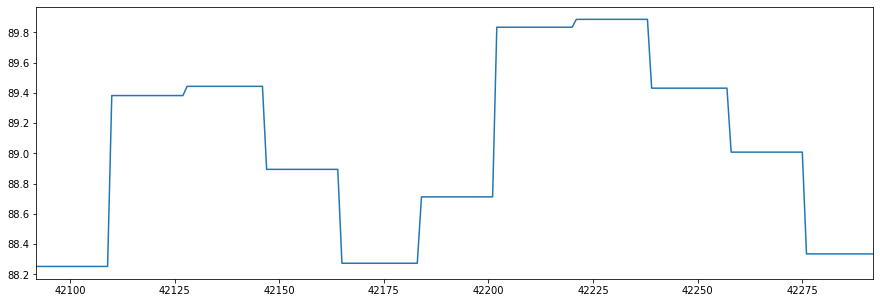

In [145]:
training.loc[42092:42092+200, 'EM_MfAir'].plot()

In [147]:
airs = standardize(training['EM_MfAir'], 414.976134, 245.724226)

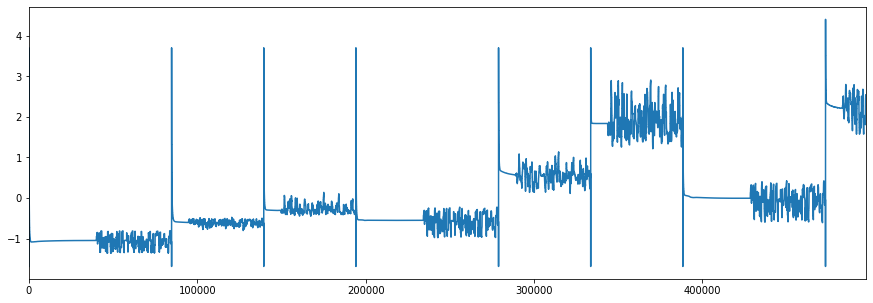

In [148]:
airs.plot()

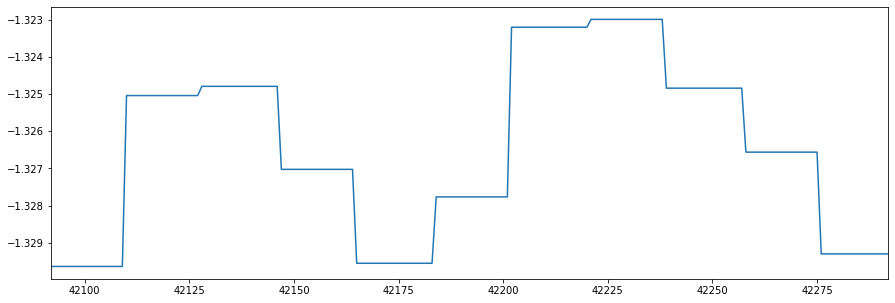

In [149]:
airs.loc[42092:42092+200].plot()